# Barras animadas

Esta es una guía para hacer barras animadas usando pandas y matplotlib. La guía completa se puede encontrar en:
https://towardsdatascience.com/bar-chart-race-in-python-with-matplotlib-8e687a5c8a41. 

Otro ejemplo con código más avanzado es este:
https://towardsdatascience.com/how-to-graph-a-bar-chart-race-and-realize-i-dont-need-one-4af698998b2e

In [28]:
#Importamos los paquetes necesarios
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML

#También hacemos que pandas muestre todas las filas
pd.set_option('display.max_rows', 1000)

In [34]:
#Cargamos la base de datos que usaremos para hacer la gráfica
df = pd.read_csv('https://gist.githubusercontent.com/johnburnmurdoch/4199dbe55095c3e13de8d5b2e5e5307a/raw/fa018b25c24b7b5f47fd0568937ff6c04e384786/city_populations', 
                 usecols=['name', 'group', 'year', 'value'])


In [4]:
#Exploramos la base de datos para entenderla
df.head(3)

name  group  year  value
0  Agra  India  1575  200.0
1  Agra  India  1576  212.0
2  Agra  India  1577  224.0

In [14]:
len(df.name)

6252

In [5]:
df.columns

Index(['name', 'group', 'year', 'value'], dtype='object')

In [6]:
df.dtypes

name      object
group     object
year       int64
value    float64
dtype: object

In [9]:
df.describe().T

count         mean          std     min          25%          50%  \
year   6252.0  1760.000000   150.411498  1500.0  1630.000000  1760.000000   
value  6252.0  2726.798569  5348.931350   130.0   308.175111   564.715909   

           75%      max  
year   1890.00   2020.0  
value  1588.55  38323.0

In [32]:
df.groupby(["group", "name"]).count()

year  value
group         name                         
Asia          Ayutthaya            1      1
              Beijing            416    416
              Dhaka               12     12
              Guangzhou          254    254
              Hangzhou           351    351
              Karachi             10     10
              Kyoto              281    281
              Nanjing            102    102
              Osaka              352    352
              Pegu                18     18
              Seoul                9      9
              Shanghai            93     93
              Suzhou              45     45
              Tokyo              403    403
Europe        Amsterdam           64     64
              Berlin             107    107
              Birmingham          26     26
              Edirne              53     53
              Istanbul           388    388
              Lisbon              42     42
              London             374    374
              Manchester          44     44
              Moscow              88     88
              Naples             290    290
              Paris              483    483
              Saint Petersburg   106    106
              Venice              43     43
              Vienna              95     95
India         Agra                69     69
              Ahmedabad          142    142
              Bijapur            127    127
              Cuttack              9      9
              Delhi               29     29
              Gauda               34     34
              Kolkatta            85     85
              Lucknow             23     23
              Mumbai              86     86
              Vijayanagar         66     66
Latin America Buenos Aires        98     98
              Mexico City         69     69
              Rio de Janeiro      19     19
              Sao Paulo           53     53
Middle East   Cairo              143    143
              Esfahan            104    104
              Fez                  7      7
              Mashhad             53     53
              Tabriz              50     50
North America Boston               5      5
              Chicago             91     91
              Los Angeles         66     66
              New York           187    187
              Philadelphia        87     87

In [27]:
pd.set_option('display.max_rows', 1000)
df.year.value_counts()

2019    12
1625    12
1633    12
1637    12
1641    12
1645    12
1649    12
1653    12
1657    12
1661    12
1665    12
1669    12
1673    12
1677    12
1681    12
1685    12
1689    12
1693    12
1697    12
1701    12
1705    12
1709    12
1713    12
1717    12
1721    12
1725    12
1729    12
1733    12
1737    12
1741    12
1745    12
1629    12
1621    12
2013    12
1617    12
1501    12
1505    12
1509    12
1513    12
1517    12
1521    12
1525    12
1529    12
1533    12
1537    12
1541    12
1545    12
1549    12
1553    12
1557    12
1561    12
1565    12
1569    12
1573    12
1577    12
1581    12
1585    12
1589    12
1593    12
1597    12
1601    12
1605    12
1609    12
1613    12
1749    12
1753    12
1757    12
1761    12
1893    12
1897    12
1901    12
1905    12
1909    12
1913    12
1917    12
1921    12
1925    12
1929    12
1933    12
1937    12
1941    12
1945    12
1949    12
1953    12
1957    12
1961    12
1965    12
1969    12
1973    12
1977    12
1981    12

Data transformation

In [53]:
#Establecemos una constante
current_year= 2018

#Hacemos un subset del dataframe original
dff = (df[df.year == current_year]).sort_values(by="value", ascending=False).head(10)
dff


name          group  year    value
6045        Tokyo           Asia  2018  38194.2
1324        Delhi          India  2018  27890.0
5547     Shanghai           Asia  2018  25778.6
689       Beijing           Asia  2018  22674.2
3748       Mumbai          India  2018  22120.0
5445    Sao Paulo  Latin America  2018  21697.8
3574  Mexico City  Latin America  2018  21520.4
4679        Osaka           Asia  2018  20409.0
1195        Cairo    Middle East  2018  19849.6
1336        Dhaka           Asia  2018  19632.6

Hacemos la gráfica base

<BarContainer object of 10 artists>

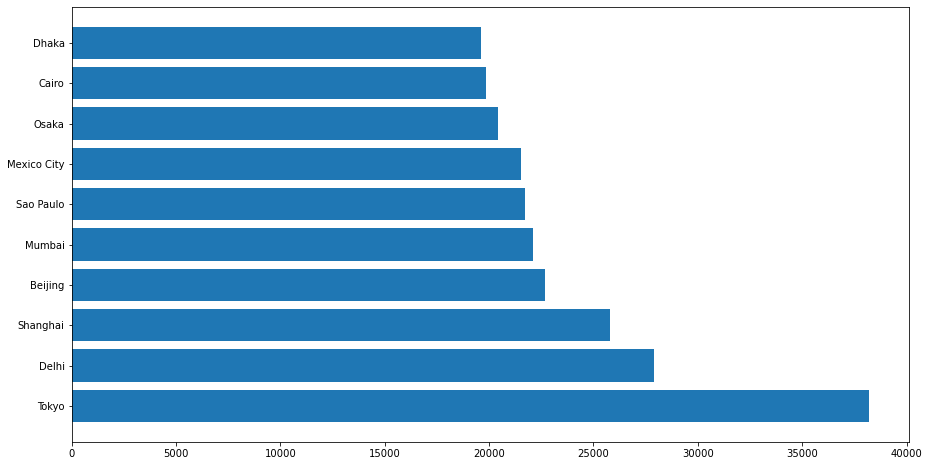

In [54]:
#Establecemos tamaño de la gráfica
fig, ax = plt.subplots(figsize=(15,8))

#le decimos que lo grafique horizontalmente y le indicamo valores a graf
ax.barh(dff["name"], dff["value"])

In [58]:
#Establecemos paleta de colores mediante un diccionario zipeado
colors = dict(zip(
    ["India","Europe", "Asia", "Latin America", "Middle East",
    "North America", "Africa"],
    ['#adb0ff', '#ffb3ff', '#90d595', '#e48381',
     '#aafbff', '#f7bb5f', '#eafb50']
))

#Luego lo establecemos como indice. Toma el nome de la ciudad como
#key y el group (continente) como value
group_lk = df.set_index("name")["group"].to_dict()

In [59]:
group_lk

{'Agra': 'India',
 'Ahmedabad': 'India',
 'Amsterdam': 'Europe',
 'Ayutthaya': 'Asia',
 'Beijing': 'Asia',
 'Berlin': 'Europe',
 'Bijapur': 'India',
 'Birmingham': 'Europe',
 'Boston': 'North America',
 'Buenos Aires': 'Latin America',
 'Cairo': 'Middle East',
 'Chicago': 'North America',
 'Cuttack': 'India',
 'Delhi': 'India',
 'Dhaka': 'Asia',
 'Edirne': 'Europe',
 'Esfahan': 'Middle East',
 'Fez': 'Middle East',
 'Gauda': 'India',
 'Guangzhou': 'Asia',
 'Hangzhou': 'Asia',
 'Istanbul': 'Europe',
 'Karachi': 'Asia',
 'Kolkatta': 'India',
 'Kyoto': 'Asia',
 'Lisbon': 'Europe',
 'London': 'Europe',
 'Los Angeles': 'North America',
 'Lucknow': 'India',
 'Manchester': 'Europe',
 'Mashhad': 'Middle East',
 'Mexico City': 'Latin America',
 'Moscow': 'Europe',
 'Mumbai': 'India',
 'Nanjing': 'Asia',
 'Naples': 'Europe',
 'New York': 'North America',
 'Osaka': 'Asia',
 'Paris': 'Europe',
 'Pegu': 'Asia',
 'Philadelphia': 'North America',
 'Rio de Janeiro': 'Latin America',
 'Saint Petersburg

Text(1, 0.4, '2018')

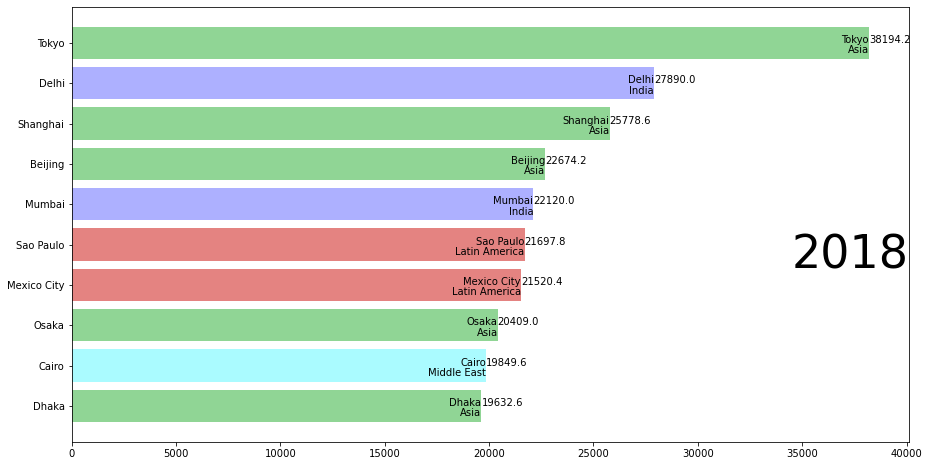

In [75]:
#Establecemos parámetros básicos de la gráfica
fig, ax = plt.subplots(figsize=(15,8))

#invertimos los valores del más grande al más pequeño (si no sería
#del más pequeño al más grande)
dff = dff[::-1]

#Le decimos a la gráfica qué valores graficar. Después le decimos cómo colorear
ax.barh(dff["name"], dff["value"], color=[colors[group_lk[x]] for x in dff["name"]])

#Itera para agregar name, group y value
for i, (value, name) in enumerate(zip(dff["value"], dff["name"])):
    ax.text(value,i, name, ha="right") #Tokio: name
    ax.text(value,i -0.25, group_lk[name], ha="right") #Asia: group name
    ax.text(value, i, value, ha="left") #38194.2: value

#Agrega el año en la mitad del cuadro (si pone el top abajo, sólo vuelve a correrlo y lo revierte)
ax.text(1, 0.4, current_year, transform=ax.transAxes, size=46, ha='right')

Pulimos la gráfica

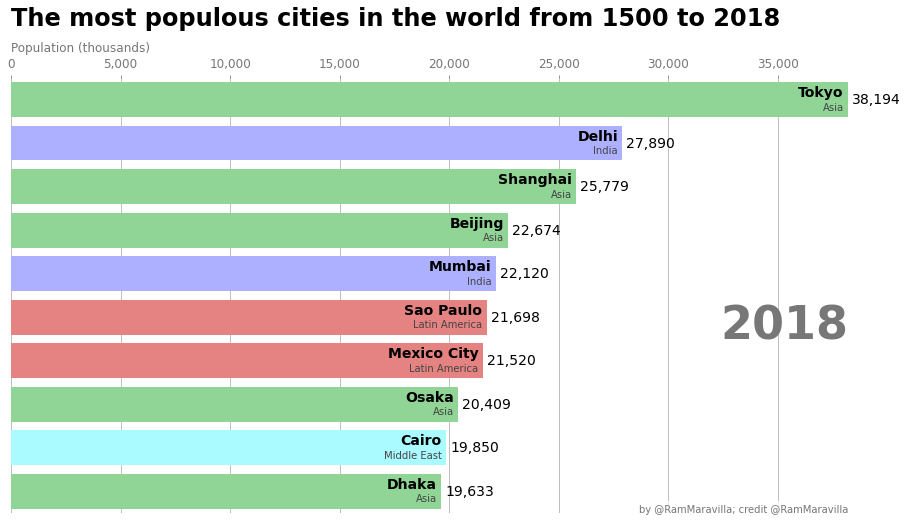

In [83]:
fig, ax = plt.subplots(figsize=(15,8))

#Hacemos una función para pulir el estilo
def draw_barchart(year):
    dff = df[df['year'].eq(year)].sort_values(by='value', ascending=True).tail(10)
    ax.clear()
    ax.barh(dff['name'], dff['value'], color=[colors[group_lk[x]] for x in dff['name']])
    dx = dff['value'].max() / 200
    for i, (value, name) in enumerate(zip(dff['value'], dff['name'])):
        ax.text(value-dx, i,     name,           size=14, weight=600, ha='right', va='bottom')
        ax.text(value-dx, i-.25, group_lk[name], size=10, color='#444444', ha='right', va='baseline')
        ax.text(value+dx, i,     f'{value:,.0f}',  size=14, ha='left',  va='center')
        
#Pulir
    ax.text(1, 0.4, year, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
    ax.text(0, 1.06, 'Population (thousands)', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.12, 'The most populous cities in the world from 1500 to 2018',
            transform=ax.transAxes, size=24, weight=600, ha='left')
    ax.text(1, 0, 'by @RamMaravilla; credit @RamMaravilla', transform=ax.transAxes, ha='right',
            color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    plt.box(False)
    
draw_barchart(2018)

Animamos la carrera

In [77]:
#La función FuncAnimation crea una animación al llamar repetidamente 
#una función

import matplotlib.animation as animation
from IPython.display import HTML

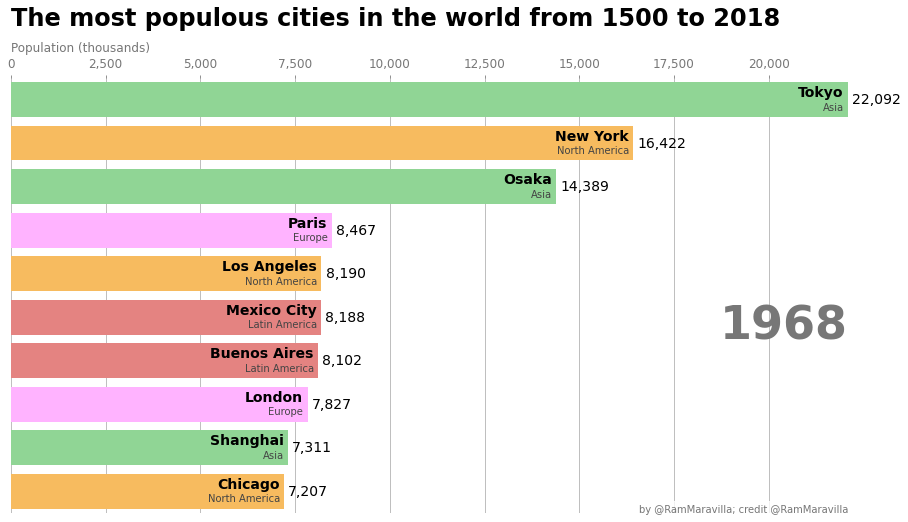

In [91]:
#Hacemos la magia
fig, ax = plt.subplots(figsize=(15,8))
animator=animation.FuncAnimation(fig, draw_barchart, frames=range(1968,2019))

#Animamos
HTML(animator.to_jshtml())

In [ ]:
#Lo guardamos
# .save as gif or mp4 fps is the speed and dpi is the resolution
#animator.save('ciudadesmáspobladas.gif',  writer='imagemagick', fps=30)

#animator.to_html5_video('ciudadesmáspobladas.gif')
#"animator.save("ciudades.gif")

#f = r"c://Users/xx/Desktop/animation.gif" 
#writergif = animation.PillowWriter(fps=30) 
#anim.save(f, writer=writergif)
writergif = animation.PillowWriter(fps=20)
animator.save("ciudadespobladas.gif", writer=writergif)